<a href="https://colab.research.google.com/github/yohan2001colombo/DataScience/blob/main/data_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
# import the library
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import (roc_auc_score, precision_score, recall_score,
                            f1_score, accuracy_score, confusion_matrix)

from scipy.stats import chi2_contingency, ks_2samp
from sklearn.utils import resample

from tqdm import tqdm  # for progress bar

In [125]:
# load the dataset
df = pd.read_csv('Dataset-Mental-Disorders.csv')

In [126]:
# show the dataset
df.head(5)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [127]:
# shape of the data
df.shape

(120, 19)

In [128]:
# check the duplicated
df.duplicated().sum()

np.int64(0)

In [129]:
# check the missing values
df.isnull().sum()

,0
Patient Number,0
Sadness,0
Euphoric,0
Exhausted,0
Sleep dissorder,0
Mood Swing,0
Suicidal thoughts,0
Anorxia,0
Authority Respect,0
Try-Explanation,0


In [130]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [131]:
# remove the patient number
df.drop('Patient Number',axis=1,inplace=True)

In [132]:
df.shape

(120, 18)

In [133]:
# levels in each category
categorical_colmns = df.select_dtypes(include='object').columns
categorical_colmns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [134]:
for i in categorical_colmns:
    print(df[i].value_counts())

Sadness
Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: count, dtype: int64
Euphoric
Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: count, dtype: int64
Exhausted
Sometimes     38
Usually       34
Most-Often    30
Seldom        18
Name: count, dtype: int64
Sleep dissorder
Sometimes     44
Usually       34
Most-Often    21
Seldom        21
Name: count, dtype: int64
Mood Swing
NO     63
YES    57
Name: count, dtype: int64
Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64
Anorxia
NO     74
YES    46
Name: count, dtype: int64
Authority Respect
NO     73
YES    47
Name: count, dtype: int64
Try-Explanation
NO     63
YES    57
Name: count, dtype: int64
Aggressive Response
NO     62
YES    58
Name: count, dtype: int64
Ignore & Move-On
NO     70
YES    50
Name: count, dtype: int64
Nervous Break-down
YES    62
NO     58
Name: count, dtype: int64
Admit Mistakes
NO     61
YES    59
Name: count, dtype: int64
Overthinking

In [135]:
# Suicidal thoughts has 3 levels "NO' "YES" and "Yes "
df["Suicidal thoughts"] = df["Suicidal thoughts"].str.strip().str.upper()

In [136]:
#yes_responses = df[df['Suicidal thoughts']=="YES"]
#len(yes_responses)
df["Suicidal thoughts"].value_counts()

,count
Suicidal thoughts,
NO,63
YES,57


In [137]:
# order the levels
categories = ['Seldom','Sometimes','Usually','Most-Often']

ordinal_encoder = OrdinalEncoder(categories=[categories])

df['Sadness'] = ordinal_encoder.fit_transform(df[['Sadness']])
df['Euphoric'] = ordinal_encoder.fit_transform(df[['Euphoric']])
df['Exhausted'] = ordinal_encoder.fit_transform(df[['Exhausted']])
df['Sleep dissorder'] = ordinal_encoder.fit_transform(df[['Sleep dissorder']])


In [138]:
# convert the data type to numeric
df['Sexual Activity'] = df['Sexual Activity'].str.extract('(\d+)').astype('Int64').astype('int64')
df['Concentration'] = df['Concentration'].str.extract('(\d+)').astype('Int64').astype('int64')
df['Optimisim'] = df['Optimisim'].str.extract('(\d+)').astype('Int64').astype('int64')


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sadness              120 non-null    float64
 1   Euphoric             120 non-null    float64
 2   Exhausted            120 non-null    float64
 3   Sleep dissorder      120 non-null    float64
 4   Mood Swing           120 non-null    object 
 5   Suicidal thoughts    120 non-null    object 
 6   Anorxia              120 non-null    object 
 7   Authority Respect    120 non-null    object 
 8   Try-Explanation      120 non-null    object 
 9   Aggressive Response  120 non-null    object 
 10  Ignore & Move-On     120 non-null    object 
 11  Nervous Break-down   120 non-null    object 
 12  Admit Mistakes       120 non-null    object 
 13  Overthinking         120 non-null    object 
 14  Sexual Activity      120 non-null    int64  
 15  Concentration        120 non-null    int

In [140]:
classes = df['Expert Diagnose']
df = df.drop('Expert Diagnose',axis=1)

In [141]:
# One-hot encode remaining object columns
remaining_categorical_colmns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df,remaining_categorical_colmns, drop_first=True)



In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sadness                  120 non-null    float64
 1   Euphoric                 120 non-null    float64
 2   Exhausted                120 non-null    float64
 3   Sleep dissorder          120 non-null    float64
 4   Sexual Activity          120 non-null    int64  
 5   Concentration            120 non-null    int64  
 6   Optimisim                120 non-null    int64  
 7   Mood Swing_YES           120 non-null    bool   
 8   Suicidal thoughts_YES    120 non-null    bool   
 9   Anorxia_YES              120 non-null    bool   
 10  Authority Respect_YES    120 non-null    bool   
 11  Try-Explanation_YES      120 non-null    bool   
 12  Aggressive Response_YES  120 non-null    bool   
 13  Ignore & Move-On_YES     120 non-null    bool   
 14  Nervous Break-down_YES   1

In [143]:
df = pd.concat([df,classes],axis=1)

In [144]:
X = df.drop('Expert Diagnose',axis=1)
y = df['Expert Diagnose']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,                # 20% for testing
    stratify=y,                   # Maintain class distribution
    random_state=42               # For reproducibility
)

In [146]:
X_train.shape

(96, 17)

In [167]:
# Specify feature types
categorical_features = X.select_dtypes(include=['object']).columns  # Categorical columns
continuous_features = X.select_dtypes(include=['float64','int64']).columns      # Continuous columns

we
specially introduces independent iso-distribution test (chi-square test for
classification variables and KS test for continuity variables) to ensure the
consistency of data distribution of training set S and test set T, and avoid the impact
of sampling error on the results.

In [ ]:
def test_category_distribution(train, test, feature):
    # Create contingency table
    contingency = pd.crosstab(
        index=np.concatenate([train[feature], test[feature]]),
        columns=np.concatenate([
            np.zeros(len(train)),
            np.ones(len(test))
        ])
    )

    chi2, p, _, _ = chi2_contingency(contingency)
    return p > 0.05  # Return True if distributions are consistent

def test_continuous_distribution(train, test, feature):
    stat, p = ks_2samp(train[feature], test[feature])
    return p > 0.05  # Return True if distributions are consistent

In [160]:
# Generate Boostrap Sampling
def generate_bootstrap_samples(X, y, categorical_features, continuous_features, n_samples=1000):
    """
    Generate 1000 valid bootstrap samples with distribution consistency

    Args:
        X: Features DataFrame
        y: Target array
        categorical_features: List of categorical column names
        continuous_features: List of continuous column names
        n_samples: Number of valid samples to generate

    Returns:
        List of (X_train, X_test, y_train, y_test) tuples
    """
    bootstrap_samples = []
    attempts = 0
    max_attempts = n_samples * 2  # Safety limit

    # Initialize progress bar
    pbar = tqdm(total=n_samples, desc="Generating bootstrap samples")

    while len(bootstrap_samples) < n_samples and attempts < max_attempts:
        attempts += 1

        # 1. Generate bootstrap sample
        X_resampled, y_resampled = resample(X, y, replace=True, random_state=attempts)

        # 2. Create stratified split (smaller test size for small samples)
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X_resampled, y_resampled,
                test_size=0.2,
                stratify=y_resampled,
                random_state=attempts
            )
        except ValueError:
            continue  # Skip if stratification fails

        # 3. Check distribution consistency for ALL specified features
        valid = True

        # Check categorical features
        for feature in categorical_features:
            try:
                # Create contingency table
                cont_table = pd.crosstab(
                    index=np.concatenate([X_train[feature], X_test[feature]]),
                    columns=np.concatenate([
                        np.zeros(len(X_train)),
                        np.ones(len(X_test))
                    ])
                )
                # Check minimum size requirements
                if cont_table.size < 4:  # At least 2x2 table
                    valid = False
                    break

                _, pval, _, _ = chi2_contingency(cont_table)
                if pval < 0.05:
                    valid = False
                    break
            except:
                valid = False
                break

        if not valid:
            continue

        # Check continuous features
        for feature in continuous_features:
            try:
                _, pval = ks_2samp(X_train[feature], X_test[feature])
                if pval < 0.05:
                    valid = False
                    break
            except:
                valid = False
                break

        # 4. Store if valid
        if valid:
            bootstrap_samples.append((X_train, X_test, y_train, y_test))
            pbar.update(1)

    pbar.close()

    if len(bootstrap_samples) < n_samples:
        print(f"Warning: Only generated {len(bootstrap_samples)}/{n_samples} valid samples")

    return bootstrap_samples


In [208]:
# model evaluate
def evaluate_model_on_bootstrap(model, bootstrap_samples):
    """
    Evaluate model on all bootstrap samples

    Returns:
        Array of evaluation scores
    """
    accuracy_val = []


    for i, (X_train, X_test, y_train, y_test) in enumerate(tqdm(
        bootstrap_samples, desc="Evaluating models")):

        try:
            model.fit(X_train, y_train)
            accuracy = model.score(X_test, y_test)


            accuracy_val.append(accuracy)


        except:
            #auc_val.append(np.nan)
            accuracy_val.append(np.nan)

    return accuracy_val

# Support Vector Machine

In [147]:
# SVM model
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.8333333333333334

In [153]:
param = {
    'kernel': ['linear','poly','rbf'],
    'C':[0.1,.4,.6,1,2,10,100,200]
}
svm_grid = GridSearchCV(svc,param)
svm_grid.fit(X_train,y_train)

svm_grid.best_params_

{'C': 0.4, 'kernel': 'linear'}

In [155]:
svc_new = SVC(C=0.4,kernel='linear')
svc_new.fit(X_train,y_train)
svc_new.score(X_test,y_test)
#

0.9166666666666666

### Evaluation with Bootstrap model

In [210]:
# support vector machine
if __name__ == "__main__":

    # 1. Generate validated bootstrap samples
    samples = generate_bootstrap_samples(
        X, y,
        categorical_features,
        continuous_features,
        n_samples=1000
    )

    # 2. Initialize model with best parameters
    model = SVC(C=0.4,kernel='linear',probability=True)

    # 3. Evaluate model
    acc = evaluate_model_on_bootstrap(model, samples)

    # 4. Analyze results
    # 4. Analyze results
    print(f"\nEvaluation Results from {len(acc)} valid bootstrap samples:")
    print(f"Mean accuracy: {np.nanmean(acc):.3f}")
    print(f"Standard deviation: {np.nanstd(acc):.3f}")
    print(f"95% Confidence Interval: {np.nanpercentile(acc, [2.5, 97.5])}")


Evaluating models: 100%|██████████| 1000/1000 [00:10<00:00, 95.00it/s]


Evaluation Results from 1000 valid bootstrap samples:
Mean accuracy: 0.905
Standard deviation: 0.063
95% Confidence Interval: [0.75 1.  ]


# Random Forest

In [173]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf.score(X_test,y_test)

0.875

In [178]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

rand_search.fit(X_train, y_train)
rand_search.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=175)

In [175]:
rf_new = RandomForestClassifier(max_depth=2, n_estimators=318)
rf_new.fit(X_train,y_train)
rf_new.score(X_test,y_test)

0.9166666666666666

### Evaluation with Bootstrap model

In [212]:
# Random Forest
if __name__ == "__main__":

    # 1. Generate validated bootstrap samples
    samples = generate_bootstrap_samples(
        X, y,
        categorical_features,
        continuous_features,
        n_samples=1000
    )

    # 2. Initialize model with best parameters
    model = RandomForestClassifier(max_depth=16, n_estimators=175)

     # 3. Evaluate model
    scores = evaluate_model_on_bootstrap(model, samples)

    # 4. Analyze results
    print(f"\nEvaluation Results from {len(scores)} valid bootstrap samples:")
    print(f"Mean accuracy: {np.nanmean(scores):.3f}")
    print(f"Standard deviation: {np.nanstd(scores):.3f}")
    print(f"95% Confidence Interval: {np.nanpercentile(scores, [2.5, 97.5])}")

Evaluating models: 100%|██████████| 1000/1000 [04:56<00:00,  3.38it/s]


Evaluation Results from 1000 valid bootstrap samples:
Mean accuracy: 0.943
Standard deviation: 0.052
95% Confidence Interval: [0.79166667 1.        ]


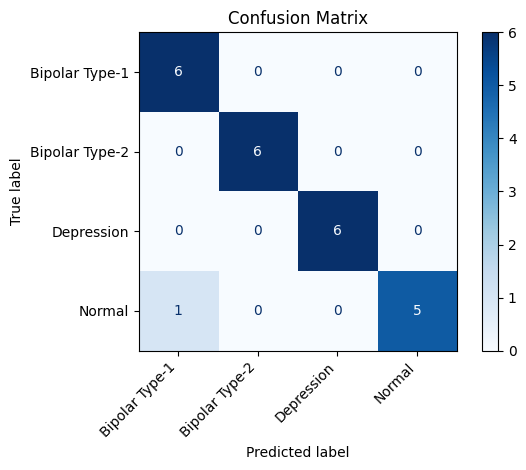

In [220]:
import matplotlib.pyplot as plt
from sklearn import metrics

predicted = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

class_labels = ["Bipolar Type-1", "Bipolar Type-2", "Depression", "Normal"]

# Plot with custom labels
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=class_labels
)

cm_display.plot(cmap="Blues")
plt.title("Confusion Matrix")

# Rotate x-axis labels (adjust angle as needed)
plt.xticks(rotation=45, ha='right')  # 'ha' aligns labels properly after rotation

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

In [216]:
predicted

array(['Depression', 'Depression', 'Depression', 'Bipolar Type-1',
       'Bipolar Type-2', 'Bipolar Type-1', 'Bipolar Type-2',
       'Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal',
       'Normal', 'Bipolar Type-1', 'Bipolar Type-2', 'Normal',
       'Depression', 'Depression', 'Bipolar Type-2', 'Bipolar Type-1',
       'Bipolar Type-1', 'Bipolar Type-2', 'Normal', 'Bipolar Type-1',
       'Normal'], dtype=object)